### Importing all the required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler,FunctionTransformer,MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn import set_config
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

### Importing dataset into pandas dataframe

In [2]:
credit_info=pd.read_csv("./Data/UCI_Credit_Card.csv")
credit_info.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### General Checking

In [3]:
credit_info.shape

(30000, 25)

In [4]:
credit_info.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

### There are no null values in the data

In [5]:
credit_info.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
credit_info.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Feature Engineering

In [7]:
credit_info.rename(columns={'PAY_0':'PAY_1',
                           'default.payment.next.month':'Default'},inplace=True)

In [8]:
credit_info

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [9]:
credit_info.drop('ID',axis=1,inplace=True)

In [10]:
credit_info

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [11]:
categorical_variables = [column for column in credit_info.columns if credit_info[column].nunique() <= 11]
numerical_variables = [column for column in credit_info.columns if credit_info[column].nunique() > 11]

In [12]:
categorical_variables

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'Default']

In [13]:
numerical_variables

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

### Grouping repeated categories into single one

In [14]:
credit_info['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [15]:
credit_info['EDUCATION']=np.where(credit_info['EDUCATION'] == 5, 4, credit_info['EDUCATION'])
credit_info['EDUCATION']=np.where(credit_info['EDUCATION'] == 6, 4, credit_info['EDUCATION'])
credit_info['EDUCATION']=np.where(credit_info['EDUCATION'] == 0, 4, credit_info['EDUCATION'])

In [16]:
credit_info['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [17]:
credit_info['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [18]:
credit_info['MARRIAGE']=np.where(credit_info['MARRIAGE'] == 0, 3, credit_info['MARRIAGE'])

In [19]:
credit_info['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [20]:
credit_info.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

### EDA

In [21]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

C:\Users\yeswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


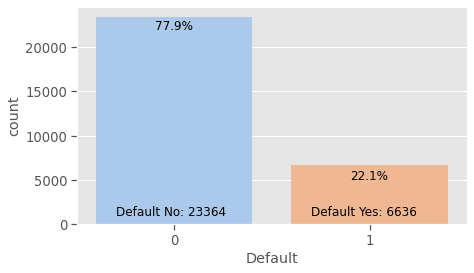

In [22]:
yes = credit_info.Default.sum()
no=len(credit_info)-yes
yes_percent = round(yes/len(credit_info)*100,1)
no_percent = round(no/len(credit_info)*100,1)

plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale= 1.2)
sns.countplot('Default', data= credit_info, palette='pastel')
plt.annotate('Default No: {}'.format(no), xy=(-0.3,15000), xytext=(-0.3, 1000), size=12)
plt.annotate('Default Yes: {}'.format(yes), xy=(0.7,15000), xytext=(0.7,1000), size=12)
plt.annotate(str(no_percent)+"%", xy=(-0.3,15000), xytext=(-0.1, 22000), size=12)
plt.annotate(str(yes_percent)+"%", xy=(0.7,15000), xytext=(0.9, 5000), size=12)
#plt.title('Credit Card  ', size=16)
plt.show()

### For better visualizations we have created a dummy dataframe with categorical variables 

In [23]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = credit_info[categorical_features]
df_cat['defaulter'] = credit_info['Default']
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'Graduate', 2 : 'University', 3 : 'High School', 4 : 'Others'}, 'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)

C:\Users\yeswa\AppData\Local\Temp\ipykernel_33720\3908436110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['defaulter'] = credit_info['Default']
C:\Users\yeswa\AppData\Local\Temp\ipykernel_33720\3908436110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'Graduate', 2 : 'University', 3 : 'High School', 4 : 'Others'}, 'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)


In [24]:
df_cat.head(10)

,SEX,EDUCATION,MARRIAGE,defaulter
0,FEMALE,University,Married,1
1,FEMALE,University,Single,1
2,FEMALE,University,Single,0
3,FEMALE,University,Married,0
4,MALE,University,Married,0
5,MALE,Graduate,Single,0
6,MALE,Graduate,Single,0
7,FEMALE,University,Single,0
8,FEMALE,High School,Married,0
9,MALE,High School,Single,0


In [25]:
def categorical_plots(column):
    
    inter=df_cat.groupby(df_cat[column])['defaulter'].mean()
    
    plt.subplot(1,2,1)
    sns.countplot(x=column,data=df_cat,order=inter.index);
    
    plt.subplot(1,2,2)
    plt.pie(inter,labels=inter.index,autopct='%0.1f%%',radius=1.2);

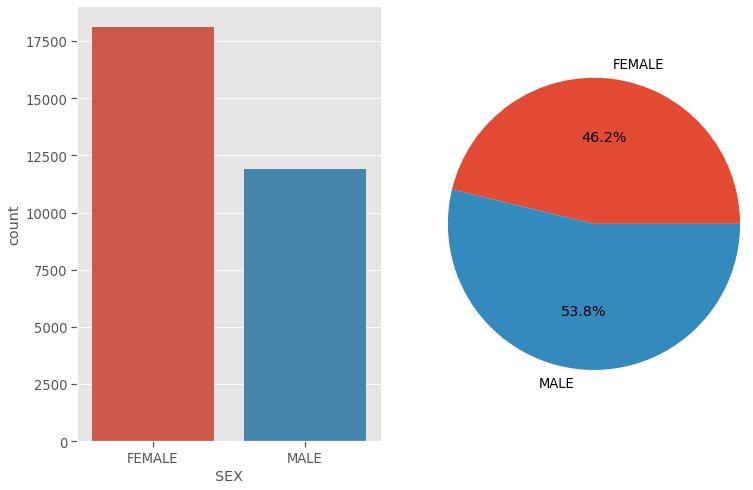

In [26]:
categorical_plots('SEX')

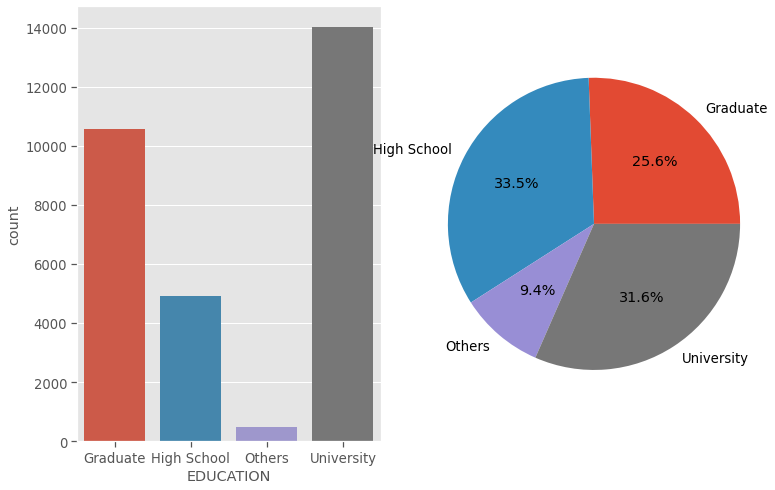

In [27]:
categorical_plots('EDUCATION')

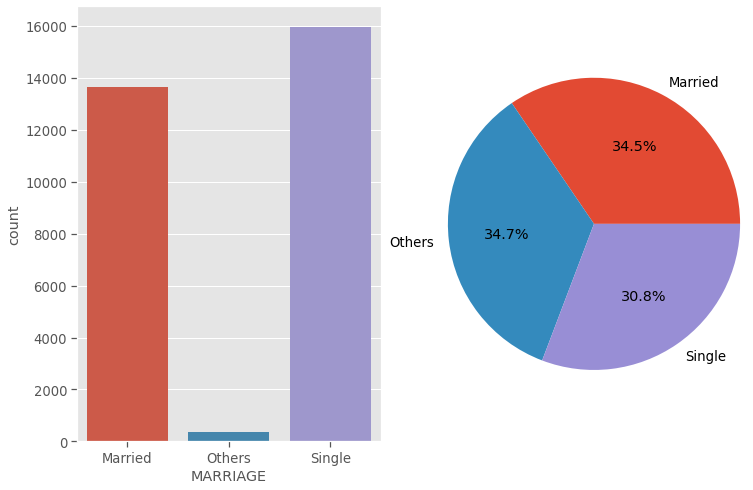

In [28]:
categorical_plots('MARRIAGE')

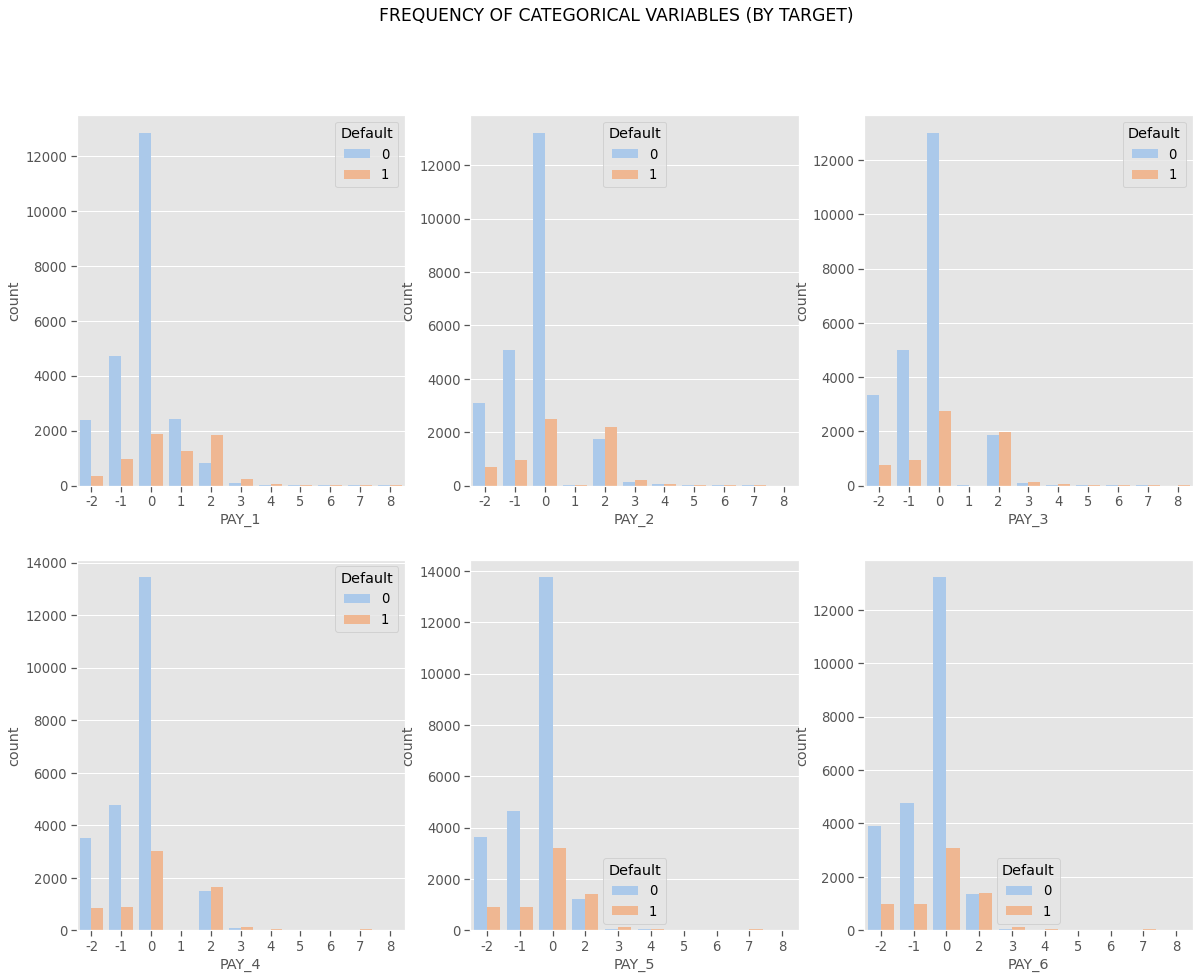

In [29]:
# Creating a new dataframe with categorical variables
subset = credit_info[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'Default']]

f, axes = plt.subplots(2, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="PAY_1", hue="Default", data=subset, palette="pastel", ax=axes[0,0])
ax2 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="pastel", ax=axes[0,1])
ax3 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="pastel", ax=axes[0,2])
ax4 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="pastel", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="pastel", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="pastel", ax=axes[1,2]);


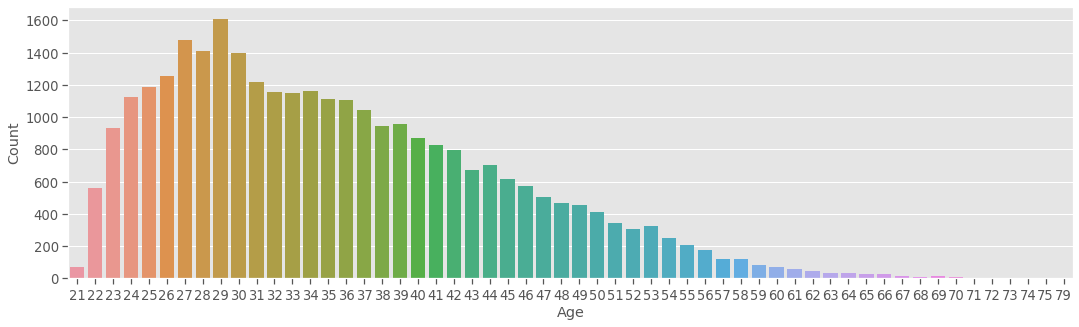

In [30]:
plt.figure(figsize=(18,5))
age=credit_info['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age,orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

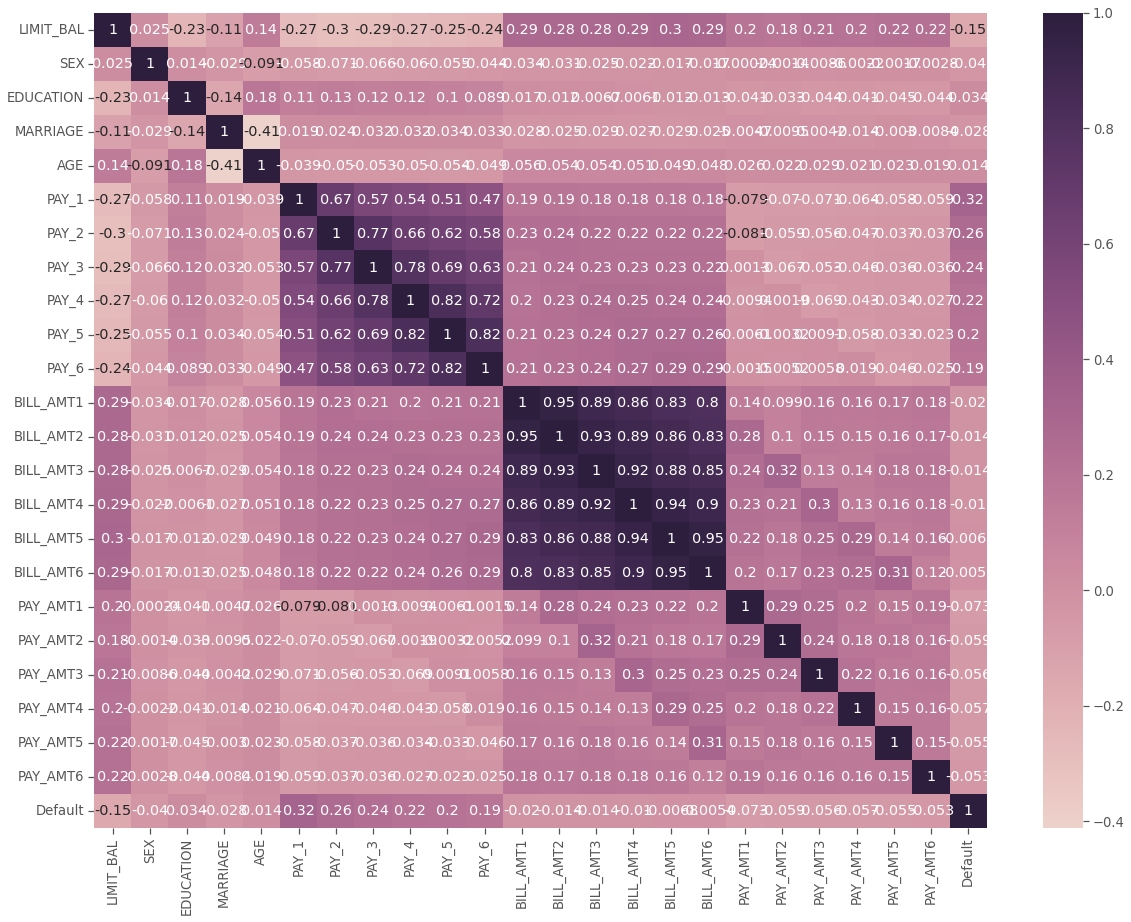

In [31]:
plt.subplots(figsize=(20,15))
sns.heatmap(credit_info.corr(),cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
plt.show()

In [32]:
y=credit_info['Default']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default, Length: 30000, dtype: int64

In [33]:
X = credit_info.loc[:,~credit_info.columns.isin(['Default'])]
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


# Logistic Regression

### Test Train Split data into training and testing sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,stratify=y,random_state=55)

In [35]:
model1 = LogisticRegression(max_iter=1000,random_state=21)
model1.fit(X_train,y_train)

y_pred = model1.predict(X_test)

print(metrics.classification_report(y_test,y_pred))
print('Accuracy of Logistic Regression model with original data is :',round(100*metrics.accuracy_score(y_pred,y_test)),'percent')

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000

Accuracy of Logistic Regression model with original data is : 78 percent


### Logistic Regression with standardized features

In [36]:
X_scaled=StandardScaler().fit_transform(X_train)
X_scaled

array([[ 1.94811244,  0.80992089, -1.13044735, ...,  0.45265752,
        -0.29964684, -0.27197344],
       [-0.3660923 ,  0.80992089, -1.13044735, ..., -0.10976455,
        -0.08363814,  0.06930371],
       [ 0.09674865, -1.23468849,  1.56042658, ..., -0.28886957,
         0.12334333,  0.38685175],
       ...,
       [-0.67465293, -1.23468849,  0.21498961, ..., -0.17812525,
        -0.18035845, -0.20917114],
       [-0.90607341, -1.23468849,  0.21498961, ..., -0.2391527 ,
         0.29814918,  0.27881582],
       [-1.13749388, -1.23468849,  0.21498961, ..., -0.25394347,
        -0.30931887, -0.29473286]])

### Using Machine learing pipelines for standardization 

In [37]:
imp_std=make_pipeline(StandardScaler())

preprocesser = make_column_transformer(
                        (imp_std,['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']),
                        remainder='passthrough'
                       )

In [38]:
preprocesser.fit_transform(X_train).round(3)

array([[ 1.948,  0.81 , -1.13 , ...,  0.453, -0.3  , -0.272],
       [-0.366,  0.81 , -1.13 , ..., -0.11 , -0.084,  0.069],
       [ 0.097, -1.235,  1.56 , ..., -0.289,  0.123,  0.387],
       ...,
       [-0.675, -1.235,  0.215, ..., -0.178, -0.18 , -0.209],
       [-0.906, -1.235,  0.215, ..., -0.239,  0.298,  0.279],
       [-1.137, -1.235,  0.215, ..., -0.254, -0.309, -0.295]])

In [39]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=5000,random_state=21)

In [40]:
pipe=make_pipeline(preprocesser,clf)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'SEX',
                                                   'EDUCATION', 'MARRIAGE',
                                                   'AGE', 'PAY_1', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=5000, random_state=21))])

In [41]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
                                     'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
                                     'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                     'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                     'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                     'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                     'PAY_AMT6'])])),
  ('logisticregression', LogisticRegression(max_iter=5000, random_state=21))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transform

### Hyerparameter Tuning using GridsearchCV

In [42]:
param_grid={'columntransformer__pipeline__standardscaler':
            [StandardScaler(),MinMaxScaler(),'passthrough'],
            'logisticregression__C':[100, 10, 1.0, 0.1, 0.01],
           }

In [43]:
%%time

gs=GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='accuracy')

gs.fit(X_train,y_train)

gs.best_params_


CPU times: total: 11.2 s
Wall time: 30.4 s


{'columntransformer__pipeline__standardscaler': MinMaxScaler(),
 'logisticregression__C': 10}

### After Hyper parameter tuning the best parameters that we received are C=10 and MinMaxScaler().

In [44]:
imp_std=make_pipeline(MinMaxScaler())

preprocesser = make_column_transformer(
                        (imp_std,['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']),
                        remainder='passthrough'
                       )

In [45]:
clf = LogisticRegression(C=10,max_iter=3000,random_state=21)

In [46]:
pipe=make_pipeline(preprocesser,clf)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['LIMIT_BAL', 'SEX',
                                                   'EDUCATION', 'MARRIAGE',
                                                   'AGE', 'PAY_1', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6'])])),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=3000, random_state=21))])

In [47]:
y_pred=pipe.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [48]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[4539,  134],
       [ 988,  339]], dtype=int64)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.72      0.26      0.38      1327

    accuracy                           0.81      6000
   macro avg       0.77      0.61      0.63      6000
weighted avg       0.80      0.81      0.78      6000



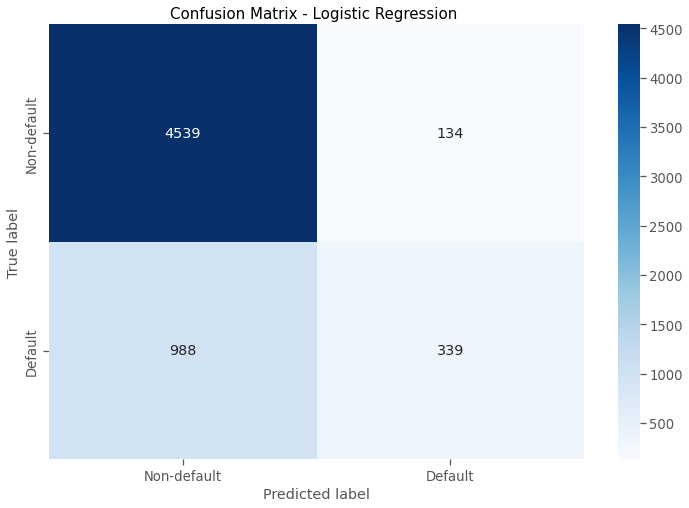

In [49]:
print(metrics.classification_report(y_test,y_pred))

sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression ",size=15);


# Feature Selection 

### We are selecting top 10 features using Recursive Feature Elimination method

In [50]:
Rfe = RFE(clf, n_features_to_select= 10)
Rfe = Rfe.fit(X_train, y_train)
print(Rfe.ranking_)


[12  1  1  1  1  1  1  1  1  1  1  7  8  9 13 14 11  2  3  4  5 10  6]


### Top 10 features 

In [51]:
X_train.columns[Rfe.support_]

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6'],
      dtype='object')

### Logistic Regression with Important features

In [52]:
imp_features=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6']

X_imp=credit_info[imp_features]

In [53]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_imp, y, test_size=.2,stratify=y,random_state=55)

In [54]:
imp_std=make_pipeline(MinMaxScaler())

preprocesser = make_column_transformer(
                        (imp_std,['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6']),
                        remainder='passthrough')

clf = LogisticRegression(C=10,max_iter=3000)
pipe=make_pipeline(preprocesser,clf)
pipe.fit(X_train_lr,y_train_lr)
y_pred_lr = pipe.predict(X_test_lr)

In [55]:
 print(metrics.classification_report(y_test_lr,y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.72      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.77      0.61      0.62      6000
weighted avg       0.80      0.81      0.77      6000



# Decision Tree Classifier

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,stratify=y,random_state=55)

In [57]:
model2 = DecisionTreeClassifier(random_state=55)
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.38      0.42      0.40      1327

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



### Decision Tree Classifier with standardized features

In [58]:
tree = DecisionTreeClassifier(random_state=55)


In [59]:
pipe=make_pipeline(preprocesser,tree)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'AGE', 'PAY_1',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=55))])

In [60]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('minmaxscaler',
                                                     MinMaxScaler())]),
                                    ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                                     'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                     'PAY_6'])])),
  ('decisiontreeclassifier', DecisionTreeClassifier(random_state=55))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline',
                                  Pipeline(steps=[('minmaxscaler',
                                                   MinMaxScaler())]),
                                  ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                                   'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
             

### Hyperparameter Tuning

In [61]:
param_grid={'columntransformer__pipeline__minmaxscaler':
            [StandardScaler(),MinMaxScaler(),'passthrough'],
            'decisiontreeclassifier__max_depth':[1,2,3,4,5,6,7,8,9,10]
           }

In [62]:
%%time

gs=GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='accuracy')

gs.fit(X_train,y_train)

gs.best_params_


CPU times: total: 24.9 s
Wall time: 39.4 s


{'columntransformer__pipeline__minmaxscaler': StandardScaler(),
 'decisiontreeclassifier__max_depth': 3}

### After Hyper parameter tuning the best parameters that we received are max_depth=3 and StandardScaler().

In [63]:
imp_std=make_pipeline(StandardScaler())

preprocesser = make_column_transformer(
                        (imp_std,['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']),
                        remainder='passthrough'
                       )

In [64]:
tree = DecisionTreeClassifier(max_depth=3,random_state=55)


In [65]:
pipe=make_pipeline(preprocesser,tree)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'SEX',
                                                   'EDUCATION', 'MARRIAGE',
                                                   'AGE', 'PAY_1', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=55))])

In [66]:
y_pred=pipe.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [67]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[4428,  245],
       [ 827,  500]], dtype=int64)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



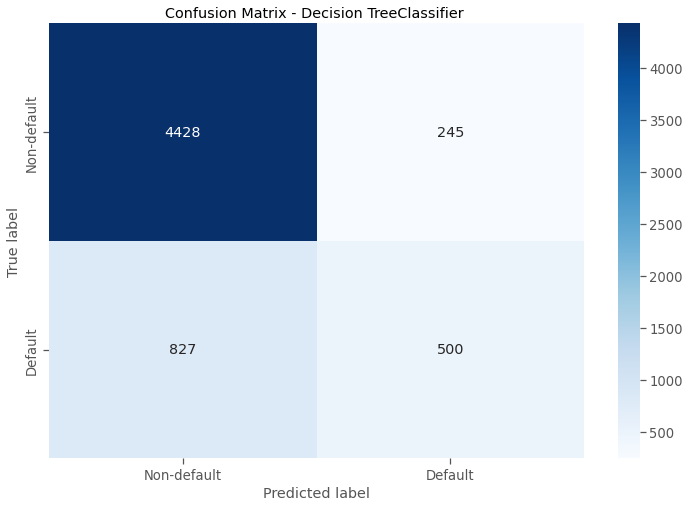

In [68]:
print(metrics.classification_report(y_test,y_pred))

sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision TreeClassifier ");

### Decision Tree Classifier with  Important features

In [69]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_imp, y, test_size=.2,stratify=y,random_state=55)

In [70]:

imp_std=make_pipeline(StandardScaler())

preprocesser = make_column_transformer(
                        (imp_std,['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6']),
                        remainder='passthrough'
                       )

tree = DecisionTreeClassifier(max_depth=3,random_state=55)
pipe=make_pipeline(preprocesser,tree)
pipe.fit(X_train_dt,y_train_dt)
y_pred=pipe.predict(X_test_dt)


In [71]:
y_pred=pipe.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [72]:
print(metrics.classification_report(y_test_dt,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.38      0.49      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



# K-nearest neighbors Classifier

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,stratify=y,random_state=55)

In [74]:
model3 = KNeighborsClassifier()
model3.fit(X_train,y_train)

y_pred = model3.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      4673
           1       0.37      0.17      0.23      1327

    accuracy                           0.75      6000
   macro avg       0.58      0.54      0.54      6000
weighted avg       0.70      0.75      0.72      6000



### K-nearest neighbors Classifier with standardized features

In [75]:
knn = KNeighborsClassifier()


In [76]:
pipe=make_pipeline(preprocesser,knn)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'AGE', 'PAY_1',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [77]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                                     'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                     'PAY_6'])])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                                   'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                        

In [78]:
param_grid={'columntransformer__pipeline__standardscaler':
            [StandardScaler(),MinMaxScaler(),'passthrough'],
            'kneighborsclassifier__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],
            'kneighborsclassifier__metric':['euclidean','manhattan']
           }

In [79]:
# %%time

# gs=GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='accuracy')

# gs.fit(X_train,y_train)

# gs.best_params_


### After Hyper parameter tuning the best parameters that we received are n_neighbors=17,metric='euclidean'and StandardScaler().

In [80]:
knn = KNeighborsClassifier(n_neighbors=17,metric='euclidean')


In [81]:
pipe=make_pipeline(preprocesser,knn)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'AGE', 'PAY_1',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=17))])

In [82]:
y_pred=pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [83]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[4484,  189],
       [1195,  132]], dtype=int64)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      4673
           1       0.41      0.10      0.16      1327

    accuracy                           0.77      6000
   macro avg       0.60      0.53      0.51      6000
weighted avg       0.71      0.77      0.71      6000



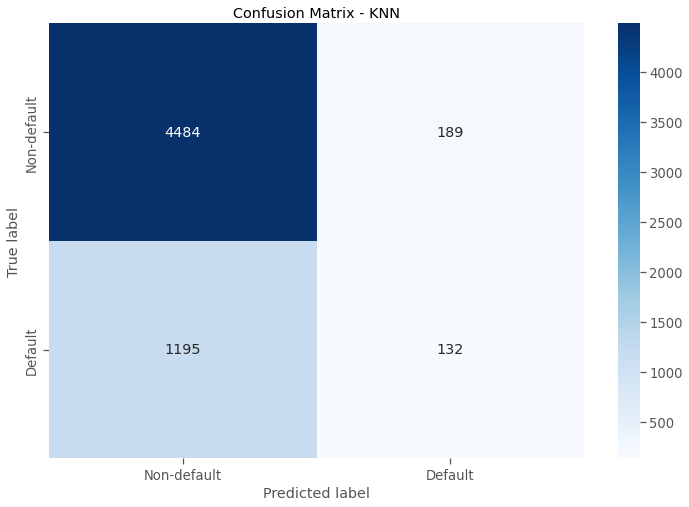

In [84]:
print(metrics.classification_report(y_test,y_pred))

sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNN");

### K-nearest neighbors Classifier with Important features

In [85]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_imp, y, test_size=.2,stratify=y,random_state=55)

In [86]:

imp_std=make_pipeline(StandardScaler())

preprocesser = make_column_transformer(
                        (imp_std,['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6']),
                        remainder='passthrough'
                       )

tree = KNeighborsClassifier(n_neighbors=17)
pipe=make_pipeline(preprocesser,knn)
pipe.fit(X_train_knn,y_train_knn)
y_pred=pipe.predict(X_test_knn)


In [87]:
print(metrics.classification_report(y_test_knn,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



# Random Forest Classifier

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,stratify=y,random_state=55)

In [89]:
model4 = RandomForestClassifier(random_state=55)
model4.fit(X_train,y_train)

y_pred = model4.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4673
           1       0.66      0.39      0.49      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.80      0.82      0.80      6000



### Random Forest Classifier with Standardized features

In [90]:
rfc=RandomForestClassifier(random_state=55)

In [91]:
pipe=make_pipeline(preprocesser,rfc)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'AGE', 'PAY_1',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=55))])

In [92]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                                     'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                     'PAY_6'])])),
  ('randomforestclassifier', RandomForestClassifier(random_state=55))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                                   'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
     

In [93]:
param_grid={'columntransformer__pipeline__standardscaler':
            [StandardScaler(),MinMaxScaler(),'passthrough'],
            'randomforestclassifier__n_estimators':[10,100,500,1000],
            'randomforestclassifier__max_depth':[3, 6, 10, 15]
           }

In [94]:
# %%time

# gs=GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='accuracy')

# gs.fit(X_train,y_train)

# gs.best_params_


### After Hyper parameter tuning the best parameters that we received are max_depth=10,n_estimators=500 and passthrough.

In [95]:
rfc=RandomForestClassifier(random_state=55,max_depth=10,n_estimators=500)

In [96]:
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.69      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [97]:
y_pred=pipe.predict(X_test)

In [98]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[4406,  267],
       [ 811,  516]], dtype=int64)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.66      0.39      0.49      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.80      0.82      0.80      6000



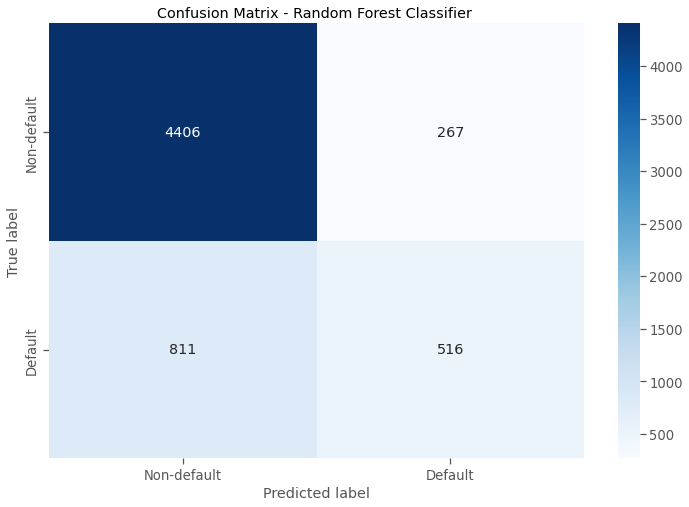

In [99]:
print(metrics.classification_report(y_test,y_pred))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest Classifier ");


### Random Forest Classifier with Important features

In [100]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_imp, y, test_size=.2,stratify=y,random_state=55)

In [101]:
rfc=RandomForestClassifier(random_state=55,max_depth=10,n_estimators=500)
rfc.fit(X_train_rf,y_train_rf)
y_pred=rfc.predict(X_test_rf)


In [102]:
imp_std=make_pipeline(StandardScaler())

preprocesser = make_column_transformer(
                        (imp_std,['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6']),
                        remainder='passthrough'
                       )

rfc=RandomForestClassifier(random_state=55,max_depth=6,n_estimators=10)
pipe=make_pipeline(preprocesser,rfc)
pipe.fit(X_train_rf,y_train_rf)
y_pred=pipe.predict(X_test_rf)


In [103]:
print(metrics.classification_report(y_test_rf,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.37      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



# XGBoost Classifier

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,stratify=y,random_state=55)

In [105]:
model5 = XGBClassifier()
model5.fit(X_train,y_train)

y_pred = model5.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



### XGBoost Classifier with standardized features

In [106]:
xgb=XGBClassifier()

In [107]:
pipe=make_pipeline(preprocesser,xgb)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'AGE', 'PAY_1',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, cols...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [108]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                                     'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                     'PAY_6'])])),
  ('xgbclassifier',
   XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                 colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                 early_stopping_rounds=None, enable_categorical=False,
                 eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
                 grow_policy='depthwise', importance_type=None,
                 interaction_constraints='', learning_rate=0.300000012,
                 max_bin=256, max_cat_threshold=64, max

In [109]:
param_grid={'columntransformer__pipeline__standardscaler':
            [StandardScaler(),MinMaxScaler(),'passthrough'],
            'xgbclassifier__n_estimators':[50,250,500,1000],
            'xgbclassifier__max_depth': [3, 6, 10, 15]
            
           }

In [110]:
# %%time

# gs=GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='accuracy')

# gs.fit(X_train,y_train)

# gs.best_params_


### After Hyper parameter tuning the best parameters that we received are max_depth=3,n_estimators=500 and StandardScaler.

In [111]:
xgb=XGBClassifier(max_depth=3,n_estimators=500)

In [112]:
pipe=make_pipeline(preprocesser,xgb)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'AGE', 'PAY_1',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, cols...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=3, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=500,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [113]:
y_pred=pipe.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [114]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[4401,  272],
       [ 819,  508]], dtype=int64)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



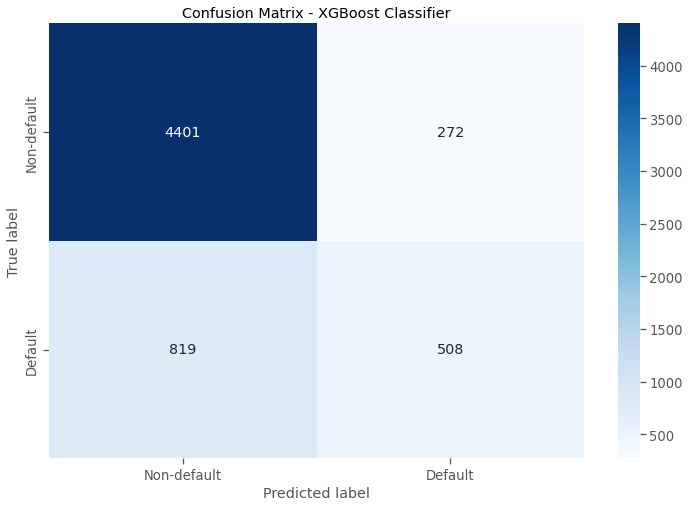

In [115]:
print(metrics.classification_report(y_test,y_pred))

sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - XGBoost Classifier");

### XGBoost Classifier with  Important Features

In [116]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X_imp, y, test_size=.2,stratify=y,random_state=55)

In [117]:
imp_std=make_pipeline(StandardScaler())

preprocesser = make_column_transformer(
                        (imp_std,['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6']),
                        remainder='passthrough'
                       )

xgb=XGBClassifier(max_depth=3,n_estimators=50)
pipe=make_pipeline(preprocesser,rfc)
pipe.fit(X_train_rf,y_train_xg)
y_pred=pipe.predict(X_test_xg)


In [118]:
print(metrics.classification_report(y_test_xg,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.37      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

